In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

num_classes = 10
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

Using TensorFlow backend.
C:\Users\Digesh\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Digesh\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Digesh\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Digesh\Anaconda3\lib\site-packages\tensorflow\python\framework\dtype

170500096/170498071 [==============================] - 201s 1us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


[4]


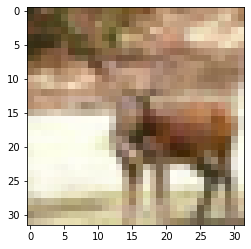

In [3]:
i=1001
plt.imshow(X_train[i])
print(y_train[i])
plt.ioff()

C:\Users\Digesh\Anaconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


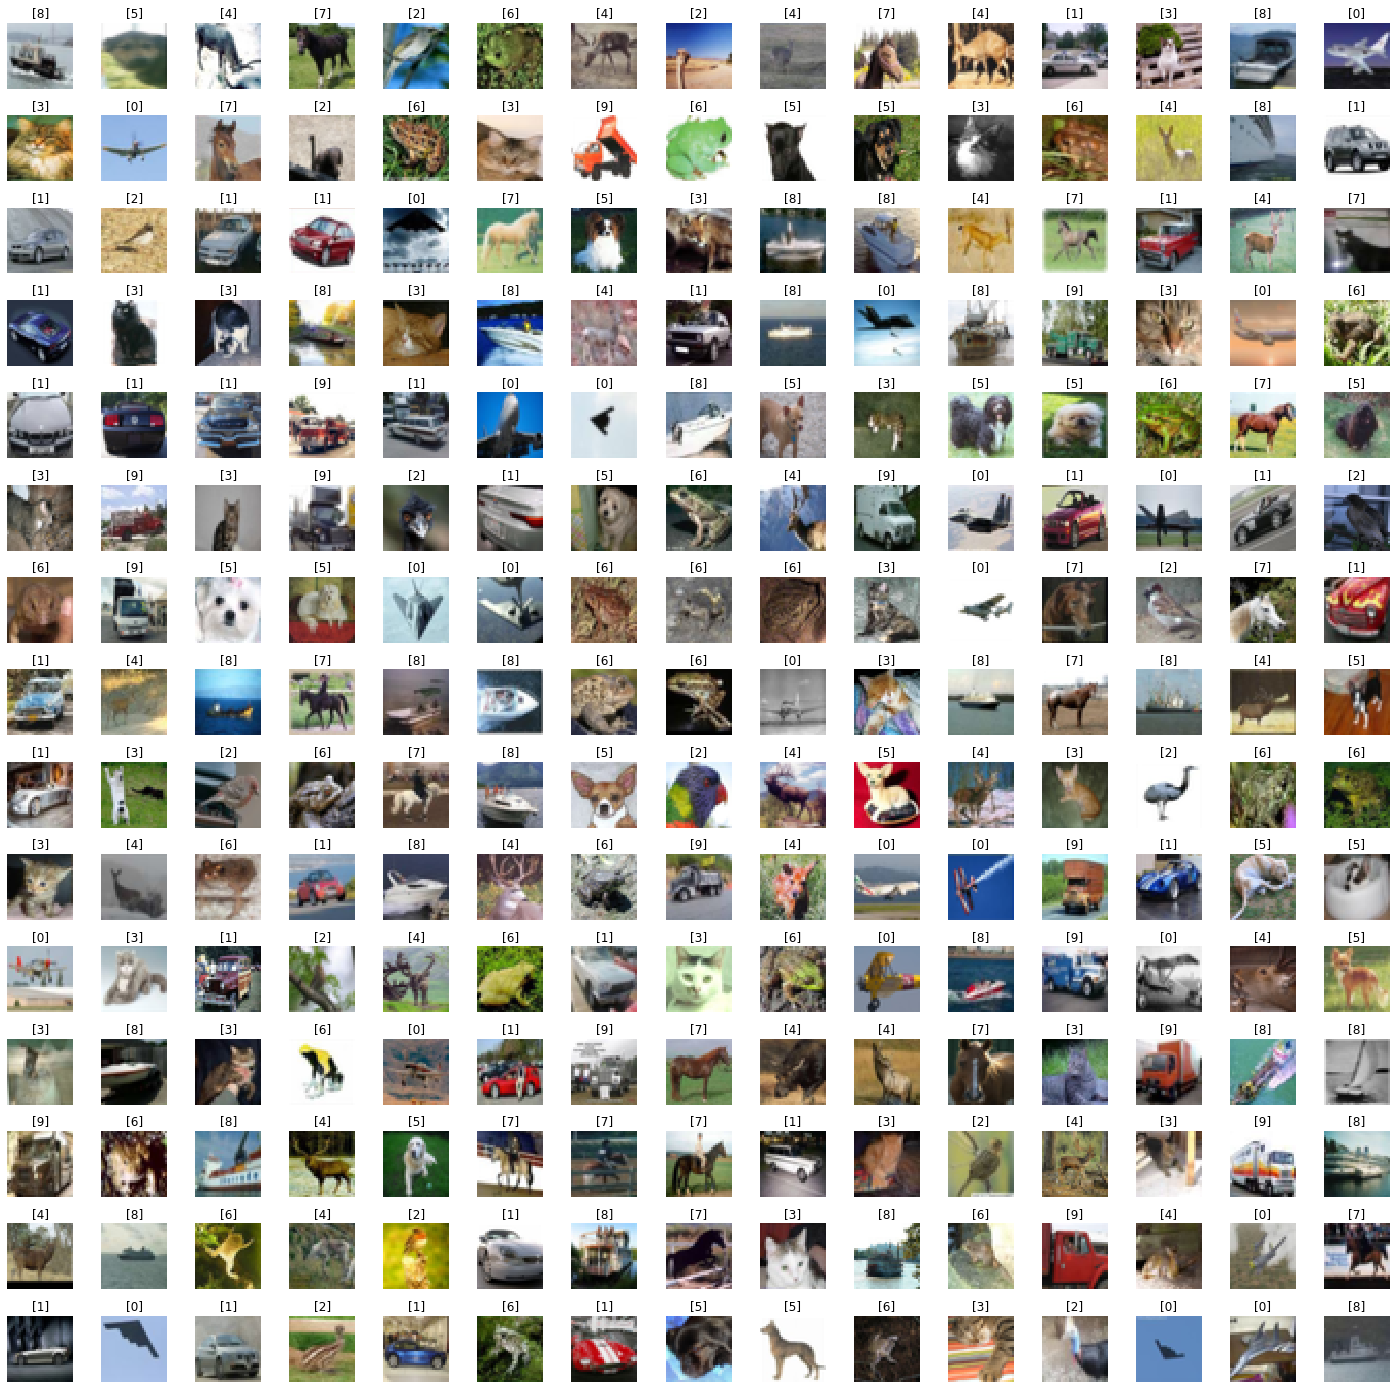

In [4]:
W_grid=15
L_grid=15
fig,axes = plt.subplots(L_grid,W_grid,figsize=(25,25))
axes=axes.ravel()
n_training=len(X_train)
for i in np.arange(0,L_grid * W_grid):
    index=np.random.randint(0,n_training) #Pick a random number 
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index]) #Prints labels on top of the picture
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

In [5]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

In [6]:
number_cat=10

In [7]:
import keras
y_train=keras.utils.to_categorical(y_train,number_cat)

In [8]:
y_test=keras.utils.to_categorical(y_test,number_cat)

In [9]:
X_train=X_train/255
X_test=X_test/255

In [10]:
X_train.shape

(50000, 32, 32, 3)

In [11]:
Input_shape = X_train.shape[1:]

In [12]:
from keras.models import Sequential 
from keras.layers import Conv2D,MaxPooling2D,AveragePooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [13]:
cnn_model=Sequential()
cnn_model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=Input_shape))
cnn_model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
cnn_model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Flatten())

cnn_model.add(Dense(units=1024,activation='relu'))

cnn_model.add(Dense(units=1024,activation='relu'))

cnn_model.add(Dense(units=10,activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [14]:
cnn_model.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.rmsprop(lr=0.001),metrics=['accuracy'])

In [15]:
history=cnn_model.fit(X_train,y_train,batch_size=32,epochs=2,shuffle=True)

Instructions for updating:
Use tf.cast instead.
Epoch 1/2
50000/50000 [==============================] - 891s 18ms/step - loss: 2.3931 - acc: 0.0950
Epoch 2/2
50000/50000 [==============================] - 861s 17ms/step - loss: 2.3028 - acc: 0.0975


In [16]:
evaluation=cnn_model.evaluate(X_test,y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

10000/10000 [==============================] - 46s 5ms/step
Test Accuracy: 0.1


In [17]:
predicted_classes=cnn_model.predict_classes(X_test)
predicted_classes

array([8, 8, 8, ..., 8, 8, 8], dtype=int64)

In [18]:
y_test=y_test.argmax(1)

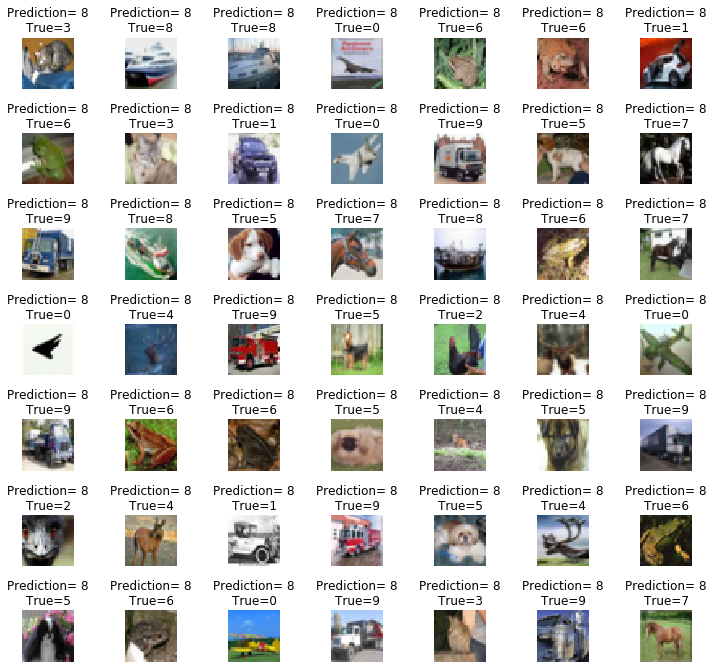

In [19]:
L=7
W=7
fig,axes=plt.subplots(L,W,figsize=(12,12))
axes=axes.ravel()

for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction= {}\nTrue={}'.format(predicted_classes[i],y_test[i]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

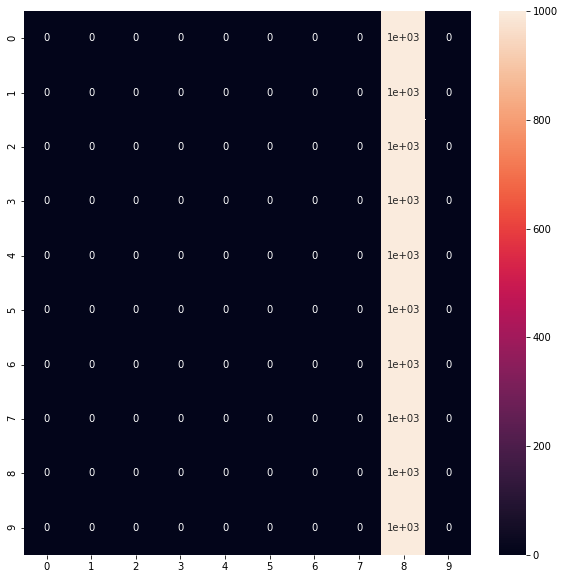

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm= confusion_matrix(y_test,predicted_classes)
cm
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True)
plt.ioff()